# IMPORTING VARIOUS LIBRARIES.


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

# MOUNTING A DRIVE.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# IMPORTING A DATASET OR ITS CSV FILE.

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SURVEY_LUNG_CANCER_DATASET_PRED.csv") 

In [4]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
1232,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
1233,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
1234,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [5]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.200323,0.496202,0.495335,0.500200,0.500200,0.500179,0.469256,0.496983,0.496983,0.496983,0.493873,0.479967,0.499256,0.496983
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [6]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [7]:
print(df.size)
print(df.shape)

19776
(1236, 16)


In [8]:
df.isnull().sum() # total null values

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

#DATA ENCODING: CONVERTIING STRING TO FLOAT

In [9]:
#GENDER               # Converting String to float
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X = df.iloc[:,0].values
df.iloc[:,0] = labelencoder.fit_transform(X)
X = X.reshape(-1,1)

In [10]:
#LUNG CANCER               # Converting String to float
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X = df.iloc[:,15].values
df.iloc[:,15] = labelencoder.fit_transform(X)
X = X.reshape(-1,1)

# CORRELATION DIAGRAM.

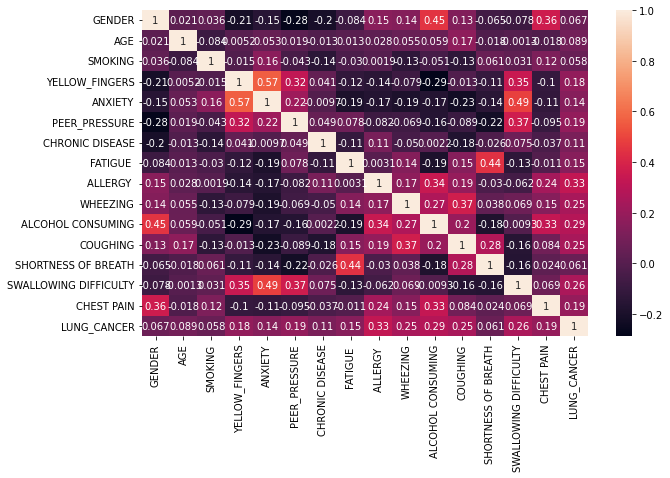

In [11]:
# Diagram
import matplotlib.pyplot as plt
corr = df.corr()
plt.subplots(figsize=(10,6))
sns.heatmap(corr,annot=True)

# DATA PREPROCESSING.

In [12]:
#df=df[['GENDER','AGE','SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC DISEASE','FATIGUE' ,'ALLERGY' ,'WHEEZING','ALCOHOL','CONSUMING','COUGHING','SHORTNESS Of BREATH','SWALLOWING DIFFICULTY','CHEST PAIN','LUNG_CANCER']]
#X=df[['GENDER','AGE','SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC DISEASE','FATIGUE' ,'ALLERGY' ,'WHEEZING','ALCOHOL','CONSUMING','COUGHING','SHORTNESS Of BREATH','SWALLOWING DIFFICULTY','CHEST PAIN']]
#y=df[['total_shares']]
X = df.iloc[:,:15]
y = df['LUNG_CANCER']


# **IMPORTING SCALERS**

# IMPORTING STANDARD SCALER.

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

print(X)

[[ 0.95257934  0.77185028 -1.13529242 ...  0.74873631  1.06350105
   0.892475  ]
 [ 0.95257934  1.38182914  0.88083033 ...  0.74873631  1.06350105
   0.892475  ]
 [-1.04978132 -0.44810745 -1.13529242 ...  0.74873631 -0.94029056
   0.892475  ]
 ...
 [ 0.95257934 -0.57010322  0.88083033 ... -1.33558369 -0.94029056
   0.892475  ]
 [ 0.95257934  0.52785873  0.88083033 ...  0.74873631 -0.94029056
   0.892475  ]
 [ 0.95257934 -0.08212013 -1.13529242 ... -1.33558369  1.06350105
  -1.12047956]]


# IMPORTING PCA SCALER.

In [14]:
from sklearn.decomposition import PCA
pca = PCA()
X = np.nan_to_num(X)
X_pca = pca.fit_transform(X)

In [15]:
pca_new = PCA(n_components=1)
X_new = pca_new.fit_transform(X)
print(X_new)

[[-0.60029657]
 [-0.69925397]
 [-0.78740135]
 ...
 [-2.61118463]
 [-1.86090302]
 [-0.70339746]]


In [16]:
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_new, y, test_size = 0.25)

print(X_train_pca.shape)
print(Y_train_pca.shape)
print(X_test_pca.shape)
print(Y_test_pca.shape)

(927, 1)
(927,)
(309, 1)
(309,)


# IMPORTING MIN-MAX SCALER.

In [17]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_mms= mms.fit_transform(X)
X_test_mms = mms.transform(X)

from sklearn.preprocessing import StandardScaler
independent_scaler = StandardScaler()
X_train_mms = independent_scaler.fit_transform(X_train_mms)
X_test_mms = independent_scaler.transform(X_test_mms)

In [18]:
from sklearn.model_selection import train_test_split
X_train_mms, X_test_mms, Y_train_mms, Y_test_mms = train_test_split(X, y, test_size = 0.25)

print(X_train_mms.shape)
print(Y_train_mms.shape)
print(X_test_mms.shape)
print(Y_test_mms.shape)

(927, 15)
(927,)
(309, 15)
(309,)


# MODELS USING **PCA**

# LOGISTIC REGRESSION – PCA.

In [19]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_new,y,test_size=0.3)

In [20]:
from sklearn.linear_model import LogisticRegression
logmodel_pca = LogisticRegression(solver='liblinear')
X = np.nan_to_num(X)
y = np.nan_to_num(y)
logmodel_pca.fit(X_train_pca,Y_train_pca)

LogisticRegression(solver='liblinear')

In [21]:
lr_predictions_pca = logmodel_pca.predict(X_test_pca)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
print(confusion_matrix(Y_test_pca, lr_predictions_pca))

[[  0  50]
 [  0 321]]


In [23]:
target_names = ['Having_cancer','Not-having_cancer']
print(classification_report(Y_test_pca, lr_predictions_pca.reshape(-1,1), target_names=target_names))


                   precision    recall  f1-score   support

    Having_cancer       0.00      0.00      0.00        50
Not-having_cancer       0.87      1.00      0.93       321

         accuracy                           0.87       371
        macro avg       0.43      0.50      0.46       371
     weighted avg       0.75      0.87      0.80       371



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
print("Accuracy: ",accuracy_score(Y_test_pca,lr_predictions_pca))

Accuracy:  0.8652291105121294


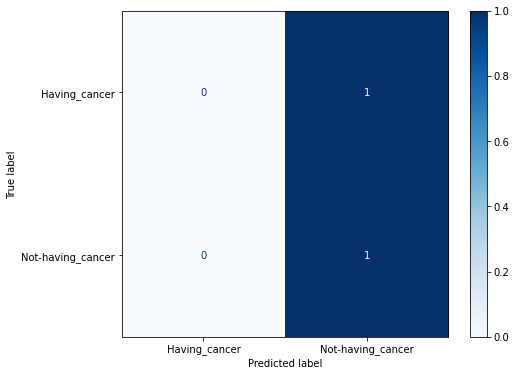

In [25]:
lr_cm_pca = confusion_matrix(Y_test_pca, lr_predictions_pca.reshape(-1,1), normalize='true')
lr_disp_pca = ConfusionMatrixDisplay(confusion_matrix=lr_cm_pca, display_labels=target_names)
lr_fig_pca, lr_ax_pca = plt.subplots(figsize=(8,6))
lr_disp_pca.plot(ax=lr_ax_pca,cmap='Blues')

# DECISION TREE CLASSIFIER - PCA.

In [26]:
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_new,y,test_size=0.3)

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtree_pca = DecisionTreeClassifier()
dtree_pca.fit(X_train_pca,Y_train_pca)

DecisionTreeClassifier()

In [28]:
dt_predictions_pca = dtree_pca.predict(X_test_pca)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score, ConfusionMatrixDisplay
print(confusion_matrix(Y_test_pca, dt_predictions_pca))

[[ 40   0]
 [  2 329]]


In [30]:
target_names = ['Having_cancer','Not-having_cancer']
print(classification_report(Y_test_pca, dt_predictions_pca.reshape(-1,1), target_names=target_names))

                   precision    recall  f1-score   support

    Having_cancer       0.95      1.00      0.98        40
Not-having_cancer       1.00      0.99      1.00       331

         accuracy                           0.99       371
        macro avg       0.98      1.00      0.99       371
     weighted avg       0.99      0.99      0.99       371



In [31]:
print("Accuracy: ",accuracy_score(Y_test_pca,dt_predictions_pca))

Accuracy:  0.9946091644204852


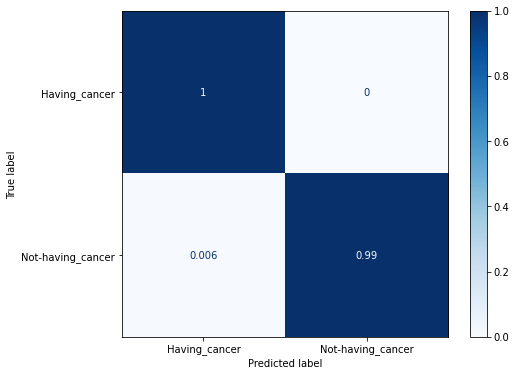

In [32]:
dt_cm_pca = confusion_matrix(Y_test_pca, dt_predictions_pca.reshape(-1,1), normalize='true')
dt_disp_pca = ConfusionMatrixDisplay(confusion_matrix=dt_cm_pca, display_labels=target_names)
dt_fig_pca, dt_ax_pca = plt.subplots(figsize=(8,6))
dt_disp_pca.plot(ax=dt_ax_pca,cmap='Blues')

# KNN CLASSIFIER - PCA.

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_new,y,test_size=0.3)

knn_pca = KNeighborsClassifier(n_neighbors=15)
knn_pca.fit(X_train_pca,Y_train_pca)
knn_predictions_pca = knn_pca.predict(X_test_pca)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(Y_test_pca,knn_predictions_pca))

[[  9  39]
 [  6 317]]


In [35]:
target_names = ['Having_cancer','Not-having_cancer']
print(classification_report(Y_test_pca, knn_predictions_pca.reshape(-1,1), target_names=target_names))

                   precision    recall  f1-score   support

    Having_cancer       0.60      0.19      0.29        48
Not-having_cancer       0.89      0.98      0.93       323

         accuracy                           0.88       371
        macro avg       0.75      0.58      0.61       371
     weighted avg       0.85      0.88      0.85       371



In [36]:
print("Accuracy: ",accuracy_score(Y_test_pca,knn_predictions_pca))

Accuracy:  0.8787061994609164


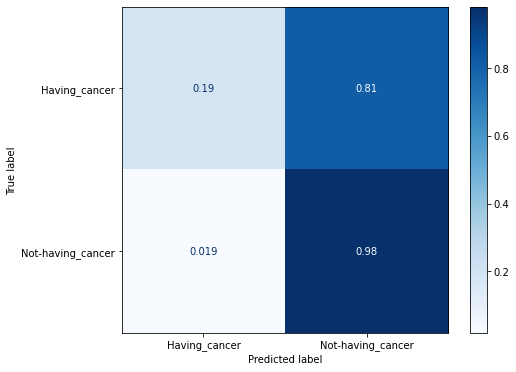

In [37]:
knn_cm_pca = confusion_matrix(Y_test_pca, knn_predictions_pca.reshape(-1,1), normalize='true')
knn_disp_pca = ConfusionMatrixDisplay(confusion_matrix=knn_cm_pca, display_labels=target_names)
knn_fig_pca, knn_ax_pca = plt.subplots(figsize=(8,6))
knn_disp_pca.plot(ax=knn_ax_pca,cmap='Blues')

# SVM CLASSIFIER - PCA.

In [38]:
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_new,y,test_size=0.3)

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
svc_pca = SVC()
svc_pca.fit(X_train_pca, Y_train_pca)

SVC()

In [40]:
svc_prediction_pca=svc_pca.predict(X_test_pca)

In [41]:
svc_cm_pca = confusion_matrix(Y_test_pca,svc_prediction_pca)
print(svc_cm_pca)

[[  0  47]
 [  0 324]]


In [42]:
target_names = ['Having_cancer','Not-having_cancer']
print(classification_report(Y_test_pca, svc_prediction_pca.reshape(-1,1), target_names=target_names))

                   precision    recall  f1-score   support

    Having_cancer       0.00      0.00      0.00        47
Not-having_cancer       0.87      1.00      0.93       324

         accuracy                           0.87       371
        macro avg       0.44      0.50      0.47       371
     weighted avg       0.76      0.87      0.81       371



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
svc_acc_score_pca = accuracy_score(Y_test_pca, svc_prediction_pca)
print("Accuracy: ",svc_acc_score_pca)

Accuracy:  0.8733153638814016


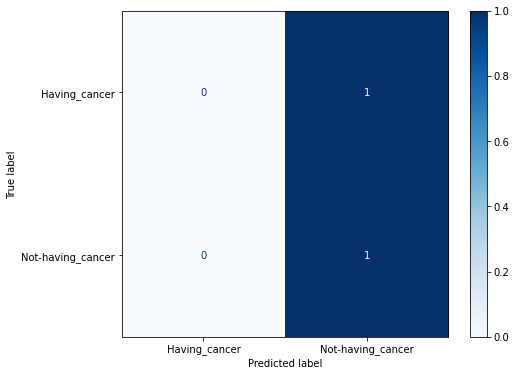

In [44]:
svm_cm_pca = confusion_matrix(Y_test_pca, svc_prediction_pca.reshape(-1,1), normalize='true')
svm_disp_pca = ConfusionMatrixDisplay(confusion_matrix=svm_cm_pca, display_labels=target_names)
svm_fig_pca, svm_ax_pca = plt.subplots(figsize=(8,6))
svm_disp_pca.plot(ax=svm_ax_pca,cmap='Blues')

# RANDOM FOREST CLASSIFIER - PCA.

In [45]:
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_new,y,test_size=0.3)

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc_pca = RandomForestClassifier(n_estimators=1236)
rfc_pca.fit(X_train_pca,Y_train_pca)

RandomForestClassifier(n_estimators=1236)

In [47]:
rfc_predictions_pca = rfc_pca.predict(X_test_pca)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score, ConfusionMatrixDisplay
print(confusion_matrix(Y_test_pca, rfc_predictions_pca))

[[ 42   4]
 [  6 319]]


In [49]:
target_names = ['Having_cancer','Not-having_cancer']
print(classification_report(Y_test_pca, rfc_predictions_pca.reshape(-1,1), target_names=target_names))

                   precision    recall  f1-score   support

    Having_cancer       0.88      0.91      0.89        46
Not-having_cancer       0.99      0.98      0.98       325

         accuracy                           0.97       371
        macro avg       0.93      0.95      0.94       371
     weighted avg       0.97      0.97      0.97       371



In [50]:
print("Accuracy: ",accuracy_score(Y_test_pca,rfc_predictions_pca))

Accuracy:  0.9730458221024259


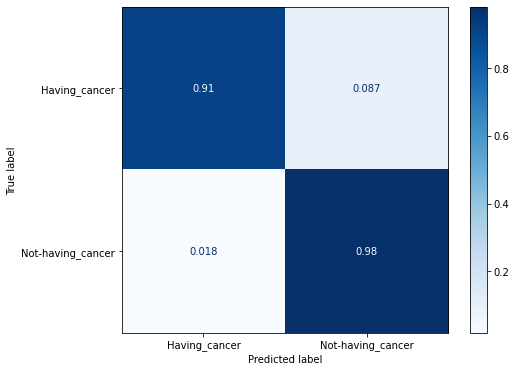

In [51]:
rfc_cm_pca = confusion_matrix(Y_test_pca, rfc_predictions_pca.reshape(-1,1), normalize='true')
rfc_disp_pca = ConfusionMatrixDisplay(confusion_matrix=rfc_cm_pca, display_labels=target_names)
rfc_fig_pca, rfc_ax_pca = plt.subplots(figsize=(8,6))
rfc_disp_pca.plot(ax=rfc_ax_pca,cmap='Blues')

# NAIVE BAYES - PCA.

In [52]:
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_new,y,test_size=0.3)

In [53]:
from sklearn.naive_bayes import GaussianNB
model_pca = GaussianNB()
model_pca.fit(X_train_pca, Y_train_pca)

GaussianNB()

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
nb_prediction_pca = model_pca.predict(X_test_pca)
nb_cm_pca = confusion_matrix(Y_test_pca,nb_prediction_pca)
print(nb_cm_pca)

[[  0  48]
 [  0 323]]


In [55]:
target_names = ['Having_cancer','Not-having_cancer']
print(classification_report(Y_test_pca, nb_prediction_pca.reshape(-1,1), target_names=target_names))

                   precision    recall  f1-score   support

    Having_cancer       0.00      0.00      0.00        48
Not-having_cancer       0.87      1.00      0.93       323

         accuracy                           0.87       371
        macro avg       0.44      0.50      0.47       371
     weighted avg       0.76      0.87      0.81       371



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
nb_accuracy_pca = accuracy_score(Y_test_pca, nb_prediction_pca)
print(nb_accuracy_pca)

0.8706199460916442


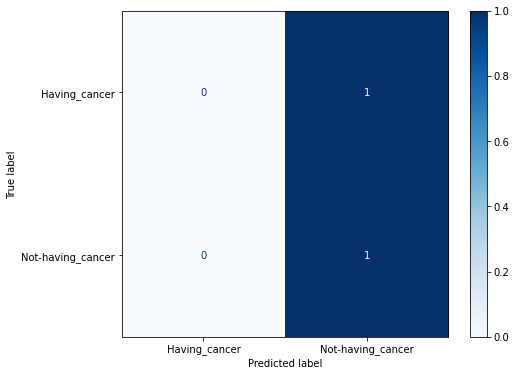

In [57]:
nb_cm_pca = confusion_matrix(Y_test_pca, nb_prediction_pca.reshape(-1,1), normalize='true')
nb_disp_pca = ConfusionMatrixDisplay(confusion_matrix=nb_cm_pca, display_labels=target_names)
nb_fig_pca, nb_ax_pca = plt.subplots(figsize=(8,6))
nb_disp_pca.plot(ax=nb_ax_pca,cmap='Blues')

# MODELS USING **MINMAX**

# LOGISTIC REGRESSION - MINMAX.

In [58]:
X_train_mms, X_test_mms, Y_train_mms, Y_test_mms = train_test_split(X,y,test_size=0.3)

In [59]:
from sklearn.linear_model import LogisticRegression
logmodel_mms = LogisticRegression(solver='liblinear')
logmodel_mms.fit(X_train_mms,Y_train_mms)

LogisticRegression(solver='liblinear')

In [60]:
lr_predictions_mms = logmodel_mms.predict(X_test_mms)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
print(confusion_matrix(Y_test_mms, lr_predictions_mms))

[[ 28  16]
 [  8 319]]


In [62]:
target_names = ['Having_cancer','Not-having_cancer']
print(classification_report(Y_test_mms, lr_predictions_mms.reshape(-1,1), target_names=target_names))

                   precision    recall  f1-score   support

    Having_cancer       0.78      0.64      0.70        44
Not-having_cancer       0.95      0.98      0.96       327

         accuracy                           0.94       371
        macro avg       0.87      0.81      0.83       371
     weighted avg       0.93      0.94      0.93       371



In [63]:
print("Accuracy: ",accuracy_score(Y_test_mms,lr_predictions_mms))

Accuracy:  0.9353099730458221


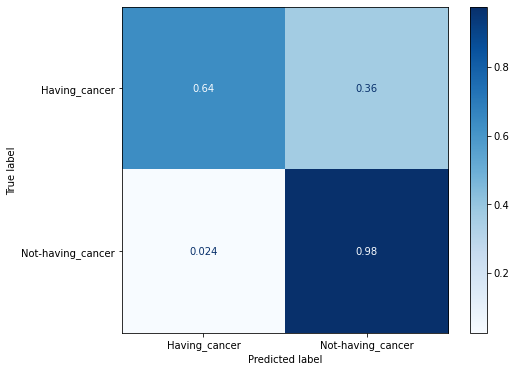

In [64]:
lr_cm_mms = confusion_matrix(Y_test_mms, lr_predictions_mms.reshape(-1,1), normalize='true')
lr_disp_mms = ConfusionMatrixDisplay(confusion_matrix=lr_cm_mms, display_labels=target_names)
lr_fig_mms, lr_ax_mms = plt.subplots(figsize=(8,6))
lr_disp_mms.plot(ax=lr_ax_mms,cmap='Blues')

# DECISION TREE CLASSIFIER- MINMAX.

In [65]:
from sklearn.model_selection import train_test_split
X_train_mms, X_test_mms, Y_train_mms, Y_test_mms = train_test_split(X,y,test_size=0.3)

In [66]:
from sklearn.tree import DecisionTreeClassifier
dtree_mms = DecisionTreeClassifier()
dtree_mms.fit(X_train_mms,Y_train_mms)

DecisionTreeClassifier()

In [67]:
dt_predictions_mms = dtree_mms.predict(X_test_mms)

In [68]:
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score, ConfusionMatrixDisplay
print(confusion_matrix(Y_test_mms, dt_predictions_mms))

[[ 41   0]
 [  1 329]]


In [69]:
target_names = ['Having_cancer','Not-having_cancer']
print(classification_report(Y_test_mms, dt_predictions_mms.reshape(-1,1), target_names=target_names))

                   precision    recall  f1-score   support

    Having_cancer       0.98      1.00      0.99        41
Not-having_cancer       1.00      1.00      1.00       330

         accuracy                           1.00       371
        macro avg       0.99      1.00      0.99       371
     weighted avg       1.00      1.00      1.00       371



In [70]:
print("Accuracy: ",accuracy_score(Y_test_mms,dt_predictions_mms))

Accuracy:  0.9973045822102425


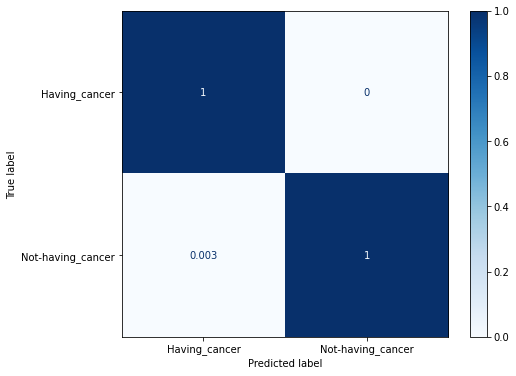

In [71]:
dt_cm_mms = confusion_matrix(Y_test_mms, dt_predictions_mms.reshape(-1,1), normalize='true')
dt_disp_mms = ConfusionMatrixDisplay(confusion_matrix=dt_cm_mms, display_labels=target_names)
dt_fig_mms, dt_ax_mms = plt.subplots(figsize=(8,6))
dt_disp_mms.plot(ax=dt_ax_mms,cmap='Blues')

# KNN CLASSIFIER - MINMAX.

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train_mms, X_test_mms, Y_train_mms, Y_test_mms = train_test_split(X,y,test_size=0.3)

knn_mms = KNeighborsClassifier(n_neighbors=15)
knn_mms.fit(X_train_mms,Y_train_mms)
knn_predictions_mms = knn_mms.predict(X_test_mms)

In [73]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(Y_test_mms,knn_predictions_mms))

[[ 28  12]
 [ 10 321]]


In [74]:
target_names = ['Having_cancer','Not-having_cancer']
print(classification_report(Y_test_mms, knn_predictions_mms.reshape(-1,1), target_names=target_names))

                   precision    recall  f1-score   support

    Having_cancer       0.74      0.70      0.72        40
Not-having_cancer       0.96      0.97      0.97       331

         accuracy                           0.94       371
        macro avg       0.85      0.83      0.84       371
     weighted avg       0.94      0.94      0.94       371



In [75]:
print("Accuracy: ",accuracy_score(Y_test_mms,knn_predictions_mms))

Accuracy:  0.9407008086253369


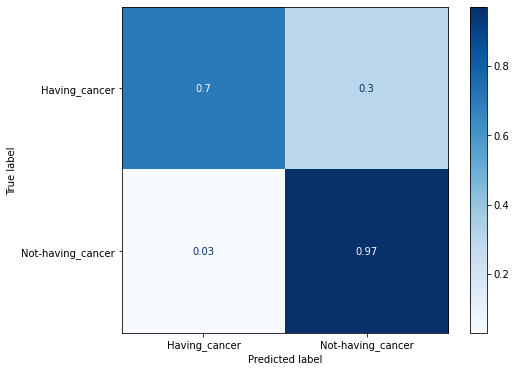

In [76]:
knn_cm_mms = confusion_matrix(Y_test_mms, knn_predictions_mms.reshape(-1,1), normalize='true')
knn_disp_mms = ConfusionMatrixDisplay(confusion_matrix=knn_cm_mms, display_labels=target_names)
knn_fig_mms, knn_ax_mms = plt.subplots(figsize=(8,6))
knn_disp_mms.plot(ax=knn_ax_mms,cmap='Blues')

# SVM CLASSIFIER - MINMAX.

In [77]:
from sklearn.model_selection import train_test_split
X_train_mms, X_test_mms, Y_train_mms, Y_test_mms = train_test_split(X,y,test_size=0.3)

In [78]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
svc_mms = SVC()
svc_mms.fit(X_train_mms, Y_train_mms)

SVC()

In [79]:
svc_prediction_mms=svc_mms.predict(X_test_mms)

In [80]:
svc_cm_mms = confusion_matrix(Y_test_mms,svc_prediction_mms)
print(svc_cm_mms)

[[ 39  10]
 [  5 317]]


In [81]:
target_names = ['Having_cancer','Not-having_cancer']
print(classification_report(Y_test_mms, svc_prediction_mms.reshape(-1,1), target_names=target_names))

                   precision    recall  f1-score   support

    Having_cancer       0.89      0.80      0.84        49
Not-having_cancer       0.97      0.98      0.98       322

         accuracy                           0.96       371
        macro avg       0.93      0.89      0.91       371
     weighted avg       0.96      0.96      0.96       371



In [82]:
svc_acc_score_mms = accuracy_score(Y_test_mms, svc_prediction_mms)
print("Accuracy: ",svc_acc_score_mms)

Accuracy:  0.9595687331536388


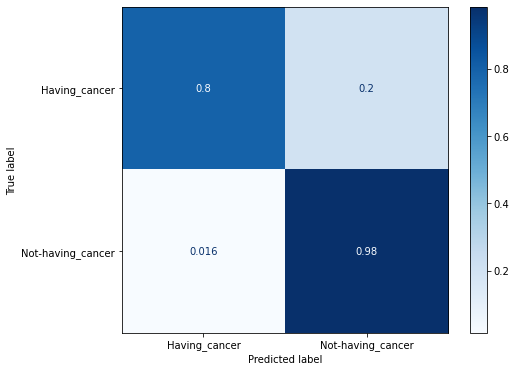

In [83]:
svm_cm_mms = confusion_matrix(Y_test_mms, svc_prediction_mms.reshape(-1,1), normalize='true')
svm_disp_mms = ConfusionMatrixDisplay(confusion_matrix=svm_cm_mms, display_labels=target_names)
svm_fig_mms, svm_ax_mms = plt.subplots(figsize=(8,6))
svm_disp_mms.plot(ax=svm_ax_mms,cmap='Blues')

# RANDOM FOREST CLASSIFIER - MINMAX.

In [84]:
from sklearn.model_selection import train_test_split
X_train_mms, X_test_mms, Y_train_mms, Y_test_mms = train_test_split(X,y,test_size=0.3)

In [85]:
from sklearn.ensemble import RandomForestClassifier
rfc_mms = RandomForestClassifier(n_estimators=1236)
rfc_mms.fit(X_train_mms,Y_train_mms)

RandomForestClassifier(n_estimators=1236)

In [86]:
rfc_predictions_mms = rfc_mms.predict(X_test_mms)

In [87]:
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score, ConfusionMatrixDisplay
print(confusion_matrix(Y_test_mms, rfc_predictions_mms))

[[ 56   3]
 [  0 312]]


In [88]:
target_names = ['Having_cancer','Not-having_cancer']
print(classification_report(Y_test_mms, rfc_predictions_mms.reshape(-1,1), target_names=target_names))

                   precision    recall  f1-score   support

    Having_cancer       1.00      0.95      0.97        59
Not-having_cancer       0.99      1.00      1.00       312

         accuracy                           0.99       371
        macro avg       1.00      0.97      0.98       371
     weighted avg       0.99      0.99      0.99       371



In [89]:
print("Accuracy: ",accuracy_score(Y_test_mms,rfc_predictions_mms))

Accuracy:  0.9919137466307277


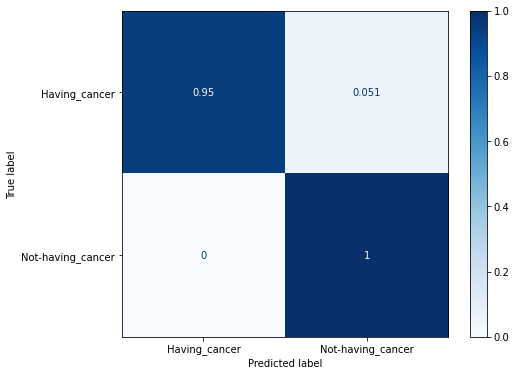

In [90]:
rfc_cm_mms = confusion_matrix(Y_test_mms, rfc_predictions_mms.reshape(-1,1), normalize='true')
rfc_disp_mms = ConfusionMatrixDisplay(confusion_matrix=rfc_cm_mms, display_labels=target_names)
rfc_fig_mms, rfc_ax_mms = plt.subplots(figsize=(8,6))
rfc_disp_mms.plot(ax=rfc_ax_mms,cmap='Blues')

# NAIVE BAYES - MINMAX.

In [91]:
from sklearn.model_selection import train_test_split
X_train_mms, X_test_mms, Y_train_mms, Y_test_mms = train_test_split(X,y,test_size=0.3)

In [92]:
from sklearn.naive_bayes import GaussianNB
model_mms = GaussianNB()
model_mms.fit(X_train_mms, Y_train_mms)

GaussianNB()

In [93]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
nb_prediction_mms = model_mms.predict(X_test_mms)
nb_cm_mms = confusion_matrix(Y_test_mms,nb_prediction_mms)
print(nb_cm_mms)

[[ 24  23]
 [ 19 305]]


In [94]:
target_names = ['Having_cancer','Not-having_cancer']
print(classification_report(Y_test_mms, nb_prediction_mms.reshape(-1,1), target_names=target_names))

                   precision    recall  f1-score   support

    Having_cancer       0.56      0.51      0.53        47
Not-having_cancer       0.93      0.94      0.94       324

         accuracy                           0.89       371
        macro avg       0.74      0.73      0.73       371
     weighted avg       0.88      0.89      0.88       371



In [95]:
nb_accuracy_mms = accuracy_score(Y_test_mms, nb_prediction_mms)
print(nb_accuracy_mms)

0.8867924528301887


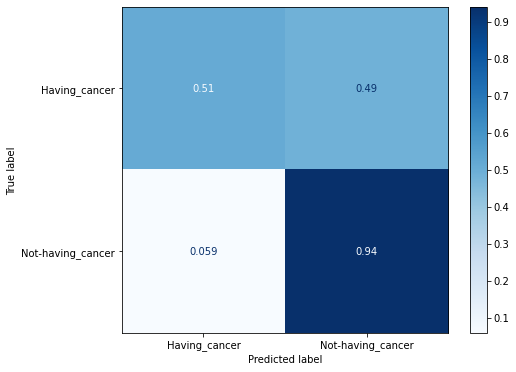

In [96]:
nb_cm_mms = confusion_matrix(Y_test_mms, nb_prediction_mms.reshape(-1,1), normalize='true')
nb_disp_mms = ConfusionMatrixDisplay(confusion_matrix=nb_cm_mms, display_labels=target_names)
nb_fig_mms, nb_ax_mms = plt.subplots(figsize=(8,6))
nb_disp_mms.plot(ax=nb_ax_mms,cmap='Blues')